# Statistical analysis on Fandango ratings

In this project I will put in practise some basic statistical analysis using two datasets on Fandango film ratings. The data comes from the [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) that journalist Walt Hickey published in 2015 published, evidencing biases in the way Fandango calculated the films ratings.

Hickey published a GitHub [repo](https://github.com/fivethirtyeight/data/tree/master/fandango) with his data, and more recently [dataquest.io]() team collected data based on 2016 and 2017 films in this [repo](https://github.com/mircealex/Movie_ratings_2016_17).

I will discuss the analysis tools that I am using.
By the way, the csv files that I used here are: 'fandango_score_comparison.csv' available at [Hickey's repo](https://github.com/fivethirtyeight/data/tree/master/fandango) and 'movie_ratings_16_17.csv' available from [dataquest staff repo](https://github.com/mircealex/Movie_ratings_2016_17).

In [2]:
import pandas as pd

In [171]:
score_comparison = pd.read_csv('fandango_score_comparison.csv')

In [172]:
score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [173]:
score_comparison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [174]:
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

In [175]:
movie_ratings_16_17.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


In [176]:
movie_ratings_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


Let's isolate Fandango relevant columns from the datasets.

In [186]:
fandango_before = score_comparison[['FILM', 
                                'Fandango_Stars', 
                                'Fandango_Ratingvalue', 
                                'Fandango_votes', 
                                'Fandango_Difference']].copy()

In [178]:
ratings_16_17 = movie_ratings_16_17[['movie', 
                                     'year', 
                                     'fandango']].copy()

We will compare films with more than 30 ratings (considered popular films) and that were released in 2015 and 2016.



In [187]:
fandango_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [188]:
fandango_before[fandango_before['Fandango_votes']>30].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 5 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.8+ KB


This means that all films in `fandango_15` dataframe have greater than 30 ratings and thus are all popular.

Now let's select those films that were released in 2015. Looking at the dataframe head, we notice that the year of the film is within the `FILM` column (the name of the film) in between brackets `()`. So we need to select by usign regular expression.

In [181]:
import re

In [189]:
#join columns together
s = fandango_before['FILM'] 

fandango_before['Year']  = s.str.extract(r"\((.*?)\)")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


In [190]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

This means that there are 17 films from 2014 that we don't want to include.
I will keep only those from 2015.

In [191]:
fandango_15 = fandango_before[fandango_before['Year']=='2015'].copy()

In [192]:
fandango_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
FILM                    129 non-null object
Fandango_Stars          129 non-null float64
Fandango_Ratingvalue    129 non-null float64
Fandango_votes          129 non-null int64
Fandango_Difference     129 non-null float64
Year                    129 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB


So, `fandango_films_15` is the data that has popular films released in 2015. Nice one.


Now let's look at the 2016 popular films from the other dataframe, `ratings_16_17`. I can't check whether the films included there have actually more than 30 reviews, but I will assume so since the [readme.md](https://github.com/mircealex/Movie_ratings_2016_17) file says that "movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017."

In [193]:
ratings_16 = ratings_16_17[ratings_16_17['year'] == 2016].copy()

In [194]:
ratings_16.year.value_counts()

2016    191
Name: year, dtype: int64

In [195]:
ratings_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 3 columns):
movie       191 non-null object
year        191 non-null int64
fandango    191 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [196]:
ratings_16.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


Nice, so now we have both dataframes `ratings_16` and `fandango_films_15` ready for being analysed.


## Analysis 

There are different type of variables in statistics:

* Qualitative, and quantitative;

which can be measured by different system of measurements, made up of four different scales of measurement: _*nominal*,  *ordinal*,  *interval*, and  *ratio*._. The characteristics of each scale pivot around three main questions: Can we tell whether two individuals are different? Can we tell the direction of the difference? Can we tell the size of the difference?



### Nominal variables 

*nominal* variables are good for qualitative variables.


Looking at the questions above: 

- We can tell whether two individuals are different or not (with respect to that variable).

- We can't say anything about the direction and the size of the difference.

- We know that it can only describe qualities.


For instance, consider the variable that is the `number on a player’s jersey`. Say that player A wears the number 5, and player B has 8. We can tell they're different with respect to jersey numbers, but it doesn't make any sense to subtract the two values and quantify the difference as a 3. Nor it makes sense to say that B is greater than A. The numbers are just identifiers here, they don't quantify anything. They are nominal.


### Ordinal variables 

*Ordinal* variables are not useful for qualitative variables.

Now, *ordinal* variables are able to distinguish measurements, but also a _direction_: any variable measured on an ordinal scale, we can tell whether individuals are different or not, we can also tell the direction of the difference. Yet, we still can't determine the size of the difference.


For example, if we have a variable called `height_label` with values `short`, `medium`, `tall`. We can both distinguish two measurements by their `height_label` and, in addition, we can tell that one is taller or shorter than the other. Yet, there is not quantitative measure of the difference.


### Interval and ratio variables 

*Intervals* and *ratio* are not useful for qualitative variables.

A variable measured on a scale that preserves the order between values, and have well-defined intervals using real numbers, is an example of a variable measured either on an interval scale, or on a ratio scale.



In practice, variables measured on interval or ratio scales are very common. Examples include:

- Height measured with a numerical unit of measurement (like inches or centimeters).

- Weight measured with a numerical unit of measurement (multiples and submultiples of grams, for instance).

- Price of various products measured with a numerical unit of measurement (like dollars, pounds, etc.).

There is a subtle difference between `ratio` and `interval` and it lies in the nature of the value  zero. In a `ratio`, zero means that there is no quantity for that variable: for instance, in a `weight`  measurement, 0 kg means that there is no mass. However, in `interval` measurements, 0 means something else. For instance, if we create a variable `weight_deviation`, having a measurement of 0 means that the value of the `weight` is exactly the mean.

Another distinction between ratio and interval is how you measure differences: in `ratio` scale, you can quantify the difference in two ways. One way is to measure a distance between any two points by simply subtracting one from another. The other way is to measure the difference in terms of ratios. Such as in `weight`, you can say that A weights 5 kg more than B, or that A’s weight is 1.2 times the weight of B.

In an `interval` scale, however, we can measure meaningfully the difference between any two points only by finding the distance between them (by subtracting one point from another). Say that the `weight_deviation` variable (which is an interval), shows that A’s weight_deviation is 1 kg and B’s weight_deviation is 2 kg. However, if we took ratios, we'd have to say that B is two times heavier than A, which is not true.

Most variables will be _ratio_, while _interval_ variables are unusual. Two examples of interval variables are: Temperature in Celsius or Fahrenheit, and time. In temperature, the 0 degrees in C does not mean lack or absence of temperature, it is a temperature. Thus the 0 is arbitrarily set as the temperature where water passes from liquid to solid state at 1 atmosphere of pressure.

Similarly, the 0 time in the calendar is arbitrarily set as the time when jess christ was born. Thus 0 does not mean zero time. At the same time, temperature can be measured in ratio scale too, with Kelvin scale, which starts from absolute 0! Is that so with time? Let's leave the questions about whether there was a beginning of time for another discussion.


Now, let's discuss how to show data visually.


### Graphs 

We look at three types of graphs:

* Bar plots.

* Pie charts.

* Histograms.

### bar plot

this is typically useful for visualising variables measured on a _nominal_ or an _ordinal_ scale. To generate a bar plot for the distribution of a variable we need two sets of values:

* One set containing the unique values (the labels).

* Another set containing the frequency for each unique value (the counts).

the code would be `pandas_dataframe['Column'].value_counts().plot.bar()`

### pie chart 

this is also used for _nominal_ and _ordinal_ variables.

The code would be `pandas_dataframe['Column'].value_counts().plot.pie()` 

I personally don’t like pie charts a lot since I think it it harder to appreciate the difference in the proportion each category takes. Colours also make a difference for pie charts.

### histograms

Histograms are used to show distribution of _interval_ and _ratio_ type variables. A histogram is like a form of a grouped frequency table. It can also be understood as a modified version of a bar plot. The main difference is that in the case of a histogram there are no gaps between bars and each bar represents an interval. While in the bar plot (used for /nominal/ or /ordinal/ variables), each bar represents a single value. 
The histogram has the x-axis divides in bins. Bins must have equal interval lengths, and, at the same time, cover together the entire range of the values of the variable the distribution of which we are trying to study.

It can be tricky to decide the number of bins in a histogram. 10 is generally a good measure to visualise as it offers a good balance between information and comprehensibility. But in histograms one can have a larger amount of bins. However, if the number of bins is too high, the histogram may be difficult to understand due to an excessive granularity. This will show a histogram with many discontinuities (bins with zero frequency), and abrupt changes of behaviour. 


Histograms can be skewed. In a skewed histogram,

* the values pile up toward the end or the starting point of the range, making up the _body_ of the distribution.

* then the values decrease in frequency toward the opposite end, forming the _tail_ of the distribution

Left (negatively) skewed histograms have a tail by the left and the body by the right hand side. While right (positively) skewed histograms, have the body on the left and the tail by the right hand side.

Symmetrical distributions are not skewed :D. In a Gaussian histogram, values accumulate in the middle and gradually decay by the sides. In a uniformly distributed histogram, all bins have the same height.

Sometimes when comparing two distributions it becomes useful to smooth over the histograms to view a superposed lines instead of superposed bins. This can be achieved with *kernel density estimate plot* or, shorter, *kernel density plot*. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values. 

The code is `Series.plot.kde()`  [function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.kde.html).


Grouped bar plots are ideal for variables measured on _nominal_ and _ordinal_ scales. For variables measured on a _ratio_ or _interval_ scale, we learned that kernel density plots are a good solution when we have many distributions to compare. 

However, kernel density plots (KDE) will become unreadable if several distributions are compared. There are other techniques to make comparisons, such as strip plots. 

`sns.stripplot()`  [function](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot).


-------------------------------


Coming back to our datasets, let's create a kernel density plot.


This is useful because the rating of the popular films in 2015 and 2016 are a ratio kind of variable. That is, we can tell whether two individuals are different (different ratings); we can tell the direction of the difference (a higher rating means a better rated film); and we can tell the size of the difference (by looking at the numerical value of the rating and the difference). (I'm not so sure this is not an interval variable! but this won't make a difference now).



I will use the column `Fandango_Stars` from the dataframe `fandango_15` and the column `fandango` from the dataframe `fandango_16`.




In [199]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

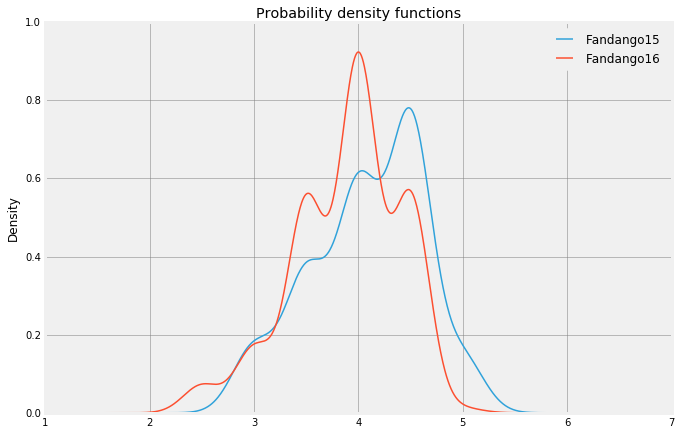

In [214]:
fig, ax = plt.subplots(figsize = (10,7))
#ax.set_facecolor((1, 1, 1))
ax.grid(color='grey', linestyle='-', linewidth=0.5)
fandango_15['Fandango_Stars'].plot.kde(label = 'Fandango15', linewidth = 1.5)
ratings_16['fandango'].plot.kde(label = 'Fandango16', linewidth = 1.5)
#plt.setp(ax, xticks=np.arange(0, 5, step=0.5))
plt.title('Probability density functions')
plt.legend()


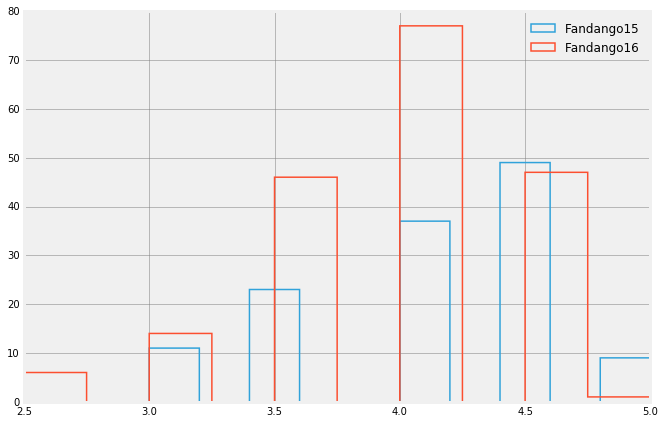

In [213]:
fig, ax = plt.subplots(figsize = (10,7))

ax.grid(color='grey',
        linestyle='-', 
        linewidth=0.5)

plt.hist(fandango_15['Fandango_Stars'], 
         histtype = 'step', 
         label = 'Fandango15',
         linewidth = 1.5)

plt.hist(ratings_16['fandango'], 
         histtype = 'step',  
         label = 'Fandango16', 
         linewidth = 1.5)

plt.legend()

plt.show()

Just as we mentioned above, the KDE (kernel density plot) estimates de probability distributions based on the sample data. The shape in both sets of data is the same as in the respective histograms. 

The KDE are normalised, while histograms use frequency. That is why the y-axis in the histograms is different for both sets of data. `Fandango15` has 129 values, while `Fandango16` has 191 (see the `dataframes.info()` above).

Looking at the kernel density plots, the ratings for 2015 has values piling up toward the right, whereas the values decrease in frequency toward the opposite end, forming the tail. This is a left (negatively) skewed distribution as it has a tail by the left and the body by the right hand side.  The histogram is similar although more noticeable in the KDE plot.

The ratings for 2016 also has tail by the left, but the body at least looks more symmetric.

It would seem as though films tended to get higher ranking in 2015 than in 2016.

### Relative frequencies

As we saw with the histogram, having different amount of values for each year requires some data management. We can calculate the relative frequencies for the two distributions to have a better view on the facts

For 2015 we have:

In [208]:
fandango_15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

While for 2016:

In [210]:
ratings_16['fandango'].value_counts(normalize = True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Let's briefly discuss the relative frequencies tables:

In 2016 there was a very little fraction of 5 stars rated films (below 1 %), while the proportion for 5-star rated films in 2015 was higher (a little bit short of 7 %).

The lowes rate in 2015 is 3 stars, while the minimum in 2016 decreased to 2.5 stars. 

Overall we see a more balanced distribution in 2016.




## Summary statistics 

Let's now calculate summary statistics:

In [204]:
mean15 = fandango_15['Fandango_Stars'].mean()
median15 = fandango_15['Fandango_Stars'].median()
mode15 = fandango_15['Fandango_Stars'].mode()[0]
print('mean15 =', mean15)
print('median15 =', median15)
print('mode15 =', mode15)
stats15 = [mean15, median15, mode15]

mean15 = 4.0852713178294575
median15 = 4.0
mode15 = 4.5


In [205]:
mean16 = ratings_16['fandango'].mean()
median16 = ratings_16['fandango'].median()
mode16 = ratings_16['fandango'].mode()[0]
print('mean16 =', mean16)
print('median16 =', median16)
print('mode16 =', mode16)


stats16 = [mean16, median16, mode16]

mean16 = 3.887434554973822
median16 = 4.0
mode16 = 4.0


(0, 5.5)

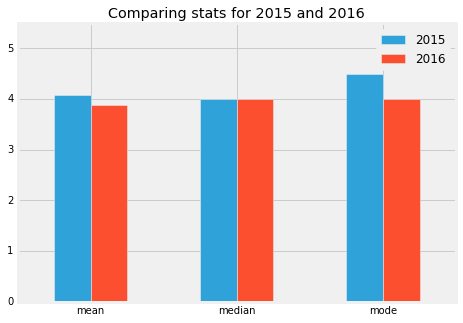

In [207]:
t2016 = [ratings_16['fandango'].mean(), ratings_16['fandango'].median(), 
         ratings_16['fandango'].mode()[0]]
t2015 = [fandango_15['Fandango_Stars'].mean(), 
         fandango_15['Fandango_Stars'].median(), 
        fandango_15['Fandango_Stars'].mode()[0]]
index = ['mean', 'median', 'mode']

df = pd.DataFrame({'2015': t2015,
                   '2016': t2016}, 
                  index=index)

fix, ax = plt.subplots(figsize = (7,5))
df.plot.bar(rot=0, ax= ax)
plt.title("Comparing stats for 2015 and 2016")
ax.legend(loc = 'best')
ax.set_ylim(0,5.5)


In [212]:
100 * (mean15 - mean16)/mean15

4.842683568951992

## Conclusion

The average rating in 2016 is slightly lower than in 2015 (about 5%), while the median is almost the same and the mode also dropped a little bit. All of this indicates that there may have been a correction in the way that the ratings are computed by Fandango. This could have been a consequence from the investigation made by Walt Hickey, although certainly our data cannot demonstrate that. In order to find that out one would need to learn more information from Fandango.


Further discussion can be found in dataquest's own version of this project in the [repo](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb), or in [this]((https://medium.freecodecamp.org/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19) article by Alex Olteanu.
